In [5]:
import os
os.environ['SPARK_HOME']='/home/envmodules/lib/spark-2.2.0-bin-hadoop2.7/'

import findspark
findspark.init()

In [7]:
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

spark = SparkSession.builder.appName('733').getOrCreate()
sc = spark.sparkContext

integrated_df = spark.read.parquet('/user/vcs/annual_integrated_dataset_v2.parquet').limit(1000).cache()
print(integrated_df.head())
df = integrated_df.cache()

# string_columns = [k for (k,v) in integrated_df.dtypes if v == 'string']
# integrated_df = integrated_df.drop(*string_columns)

double_columns = [k for (k,v) in integrated_df.dtypes if v == 'double']
df = integrated_df.select(*double_columns)

print('ultra 6')
#
# import csv
#
# null_count_list = []
# # annual_compustat_null_count.csv
# with open('annual_compustat_null_count.csv', 'r') as f:
#     reader = csv.reader(f)
#     your_list = list(reader)
#     null_count_list = your_list[0]
#     null_count_list = [float(x) for x in null_count_list]


from pyspark.sql.functions import isnan, when, count, col

nullcounts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
null_count_list = list(nullcounts.first())

good_columns = []
total_rows = integrated_df.count()
for i in range(0, len(null_count_list)):
    if null_count_list[i]/total_rows < 0.4:
        good_columns.append(i)

great_columns = [df.columns[i] for i in good_columns]
df = df.select(*great_columns)


from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=df.columns,
    outputCols=["{}_imputed".format(c) for c in df.columns]
)
df = imputer.fit(df).transform(df)

df = df.drop(*great_columns)

df.head()
print('v2 great')


assembler = VectorAssembler(
    inputCols=df.columns,
    outputCol="features")

output = assembler.transform(df)

output.head()

from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col
spark = SparkSession.builder.appName('733').getOrCreate()
sc = spark.sparkContext

"""
An example for computing correlation matrix.
Run with:
  bin/spark-submit examples/src/main/python/ml/correlation_example.py
"""
# from __future__ import print_function

from pyspark.ml.stat import Correlation
df = output

r1 = Correlation.corr(df, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))

r2 = Correlation.corr(df, "features", "spearman").head()
print("Spearman correlation matrix:\n" + str(r2[0]))
# $example off$

spark.stop()




Row(cga=None, ESTIMATOR=None, pifo=None, pncia=None, itcb=0.0, salepfp=None, INV=None, siv=0.0, xacc=0.286, optprcey=None, txfed=0.04, AAER42=None, dcom=None, niintpfp=None, cimii=None, dv=0.165, prodv=None, optvol=None, fincf=None, optexd=None, AAER33=None, AAER10=None, AAER14=None, isgr=None, CONAME_y=None, AAER27=None, ACTTIMS=None, esopdlt=None, YEARA=None, pstkc=0.0, ID=None, AUDIT=None, xeqo=None, ci=None, oibdp=0.921, tdc=None, prch_f=None, AAER34=None, ipodate=None, gdwlam=None, PAY=None, AAER38=None, transa=None, xido=0.236, ppevo=0.0, sret=None, AAER20=None, act=4.252, acqintan=None, tstkc=None, xagt=None, UNDERSTATEMENT=None, gla=None, AAER29=None, capx=0.227, oprepsx=None, acchg=None, dvpsp_f=0.8, prirow=None, cdvc=None, AAER31=None, dvpdp=None, ppenb=0.636, ivncf=None, aqc=0.0, txr=0.0, FPEDATS=None, xrd=0.119, npat=None, VALUE=None, clt=None, dpacls=None, fopt=1.049, acominc=None, esopct=None, invofs=None, rect=1.392, mii=0.0, icapt=7.364, ANNDATS_ACT=None, optca=None, rv

In [45]:
df.columns

['pifo_imputed',
 'itcb_imputed',
 'xacc_imputed',
 'dv_imputed',
 'pstkc_imputed',
 'oibdp_imputed',
 'xido_imputed',
 'ppevo_imputed',
 'act_imputed',
 'tstkc_imputed',
 'capx_imputed',
 'dvpsp_f_imputed',
 'ppenb_imputed',
 'aqc_imputed',
 'txr_imputed',
 'xrd_imputed',
 'VALUE_imputed',
 'dpacls_imputed',
 'rect_imputed',
 'mii_imputed',
 'icapt_imputed',
 'gp_imputed',
 'ppenls_imputed',
 'xpp_imputed',
 'invt_imputed',
 'dvpa_imputed',
 'ni_imputed',
 'chech_imputed',
 'xi_imputed',
 'emp_imputed',
 'ceq_imputed',
 'spi_imputed',
 'fate_imputed',
 'ppent_imputed',
 'xpr_imputed',
 'xopr_imputed',
 'invrm_imputed',
 'sale_imputed',
 'xlr_imputed',
 'xad_imputed',
 'invwip_imputed',
 'revt_imputed',
 'do_imputed',
 'ivch_imputed',
 'reajo_imputed',
 'dcpstk_imputed',
 'fatn_imputed',
 'tstkp_imputed',
 'dp_imputed',
 'fatb_imputed',
 'fato_imputed',
 'ppevr_imputed',
 'dcvt_imputed',
 'ppennr_imputed',
 'reuna_imputed',
 'wcap_imputed',
 'dm_imputed',
 'np_imputed',
 'dvc_imputed',

In [8]:
r1[0]

DenseMatrix(95, 95, [1.0, -0.1468, 0.4489, -0.1368, -0.0, 0.3472, -0.1363, 0.1075, ..., 0.4033, 0.9183, -0.0049, 0.7581, 0.3999, 0.2063, 0.764, 1.0], False)

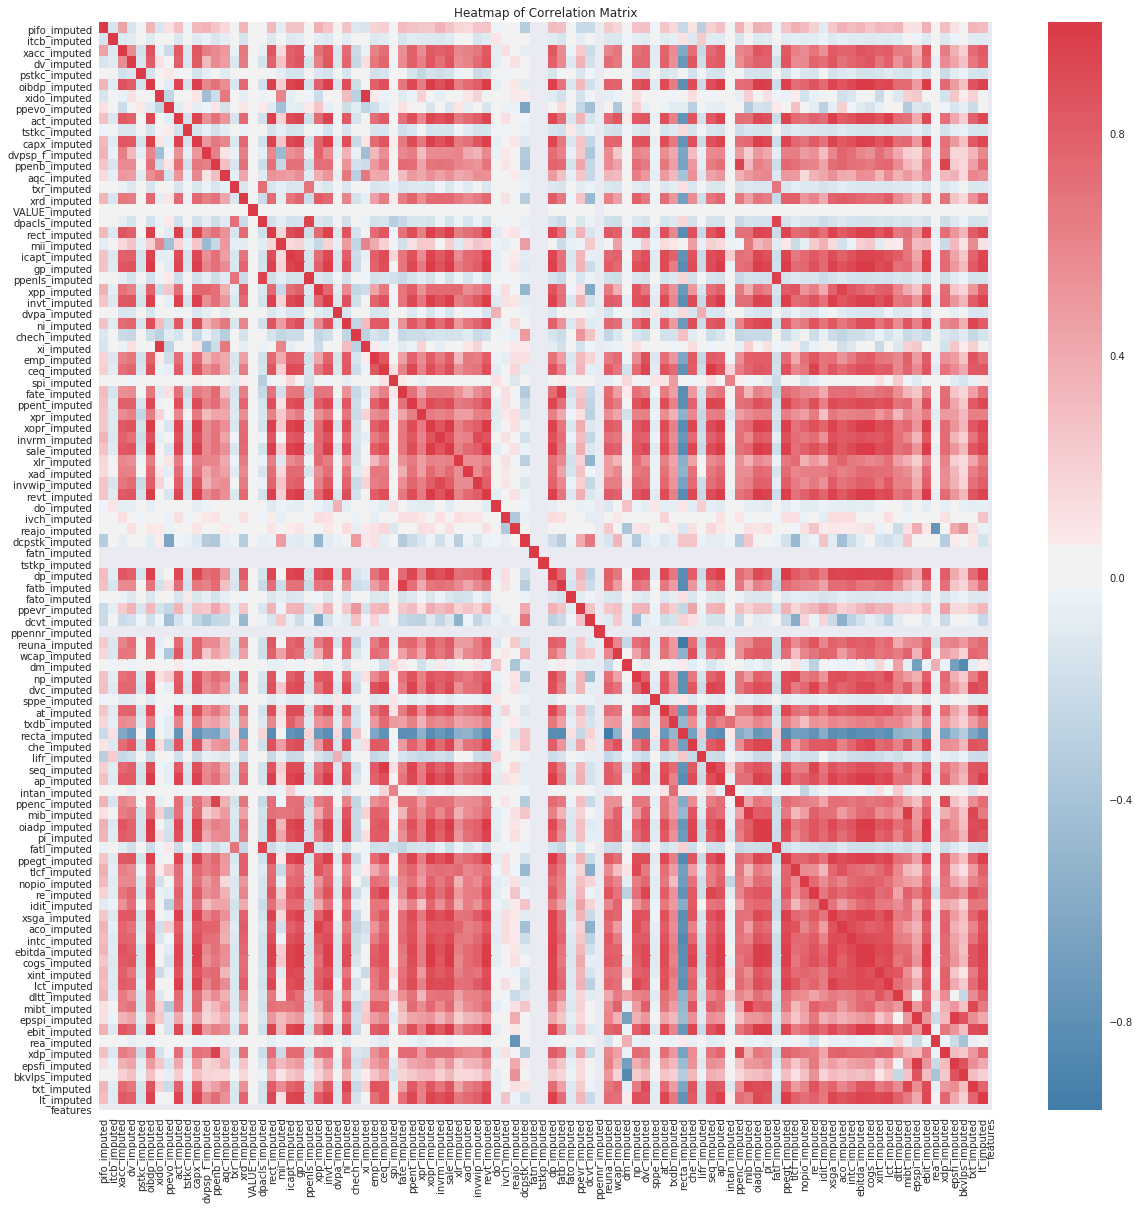

In [48]:
from pyspark.mllib.linalg import Vectors, DenseMatrix 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 


from pyspark.mllib.linalg import Vectors, DenseMatrix 
import numpy as np

m = r1[0].toArray().astype(np.float)
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, n=20, as_cmap=True)
sns.heatmap(m, annot=False, cmap = cmap, fmt='.2f', xticklabels=df.columns, yticklabels=df.columns);
plt.title('Heatmap of Correlation Matrix');
# display_cm(m)

In [16]:
r1[0]

DenseMatrix(95, 95, [1.0, -0.1468, 0.4489, -0.1368, -0.0, 0.3472, -0.1363, 0.1075, ..., 0.4033, 0.9183, -0.0049, 0.7581, 0.3999, 0.2063, 0.764, 1.0], False)